# 📁 02_churn_classification.ipynb

# ## 1. Introduction
"""
Predict customer churn using XGBoost classification model.
This notebook trains on the previously generated synthetic dataset and explains the insights.
"""

In [1]:
# ## 2. Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

# ## 3. Load Dataset
df = pd.read_csv("data/retention_insights_fake_customers.csv")
df.head()

,customer_id,tenure_months,monthly_spend,num_complaints,is_on_promo_plan,used_app_this_week,segment,churned
0,CUST0000,39,70.95,0,0,1,Premium,0
1,CUST0001,52,44.15,3,0,1,Premium,0
2,CUST0002,29,67.24,2,0,0,Basic,0
3,CUST0003,15,57.88,1,0,1,Plus,0
4,CUST0004,43,53.50,0,1,1,Basic,0


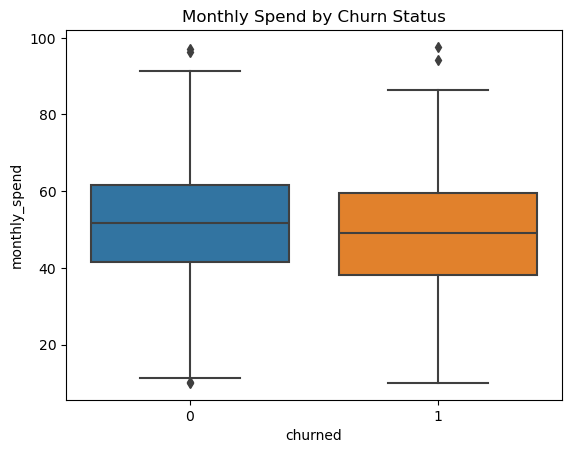

In [2]:
# ## 4. Exploratory Data Analysis
sns.boxplot(x='churned', y='monthly_spend', data=df)
plt.title("Monthly Spend by Churn Status")
plt.show()

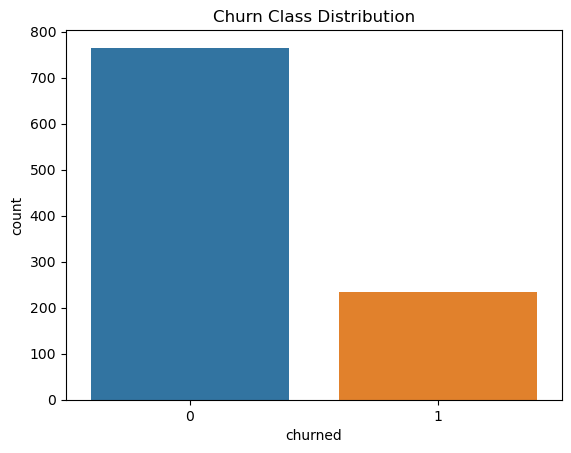

In [3]:
sns.countplot(x='churned', data=df)
plt.title("Churn Class Distribution")
plt.show()

In [4]:
# ## 5. Preprocessing
X = df.drop(columns=['customer_id', 'churned'])
X = pd.get_dummies(X, drop_first=True)
y = df['churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# ## 6. Train Model with Class Weighting
# Calculate scale_pos_weight = (negative class / positive class)
neg, pos = np.bincount(y_train)
scale = neg / pos
print(f"Using scale_pos_weight: {scale:.2f}")

model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale
)
model.fit(X_train, y_train)

Using scale_pos_weight: 3.21


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [10:48:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [6]:
# ## 7. Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       155
           1       0.31      0.36      0.33        45

    accuracy                           0.68       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.69      0.68      0.68       200



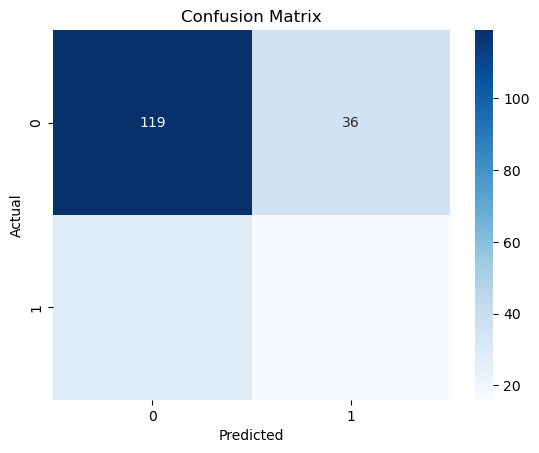

In [7]:
# ## 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
import shap

# ## 9. SHAP Explainability
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

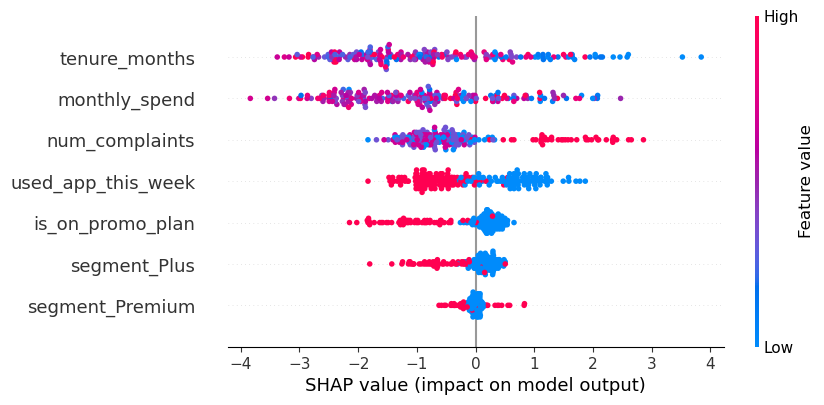

In [10]:
# Summary plot (global feature importance)
shap.plots.beeswarm(shap_values)